In [330]:
#Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import json
from config import api_key

In [331]:
#Build the url
urlmktcap=f"https://min-api.cryptocompare.com/data/top/mktcapfull?limit=10&tsym=USD&api_key={api_key}"
urlvolume="https://min-api.cryptocompare.com/data/top/totalvolfull?limit=10&tsym=USD&api_key={api_key}"

In [332]:
#Get the information with json format, and isolates data items for easy reading
responsemktcap=requests.get(urlmktcap).json()
datamktcap=response["Data"]
#data

In [333]:
#Obtain the names of the top 10 main currencies considering Market Capitalization. Create a list for the name, price and mktcap for each cryptocurrencies in the top 10. 
indexes=range(0,10)
name_mktcap_list=[]
price_mktcap_list=[]
mktcap_list=[]
for index in indexes:
    name=data[index]["CoinInfo"]["FullName"]
    price=data[index]["RAW"]["USD"]["PRICE"]
    mktcap=data[index]["RAW"]["USD"]['MKTCAP']
    name_mktcap_list.append(name)
    price_mktcap_list.append(price)
    mktcap_list.append(mktcap)

In [334]:
#Create a DataFrame with the information
mktcap_df1=pd.DataFrame({
    "Cryptocurrency":name_mktcap_list,
    "Price":price_mktcap_list,
    "Market Capitalization":mktcap_list
})

In [335]:
#Format the columns
mktcap_df1["Price"] = mktcap_df["Price"].map("${:,.2f}".format)
mktcap_df1["Market Capitalization"] = mktcap_df["Market Capitalization"].map("${:,.2f}".format)
mktcap_df1

,Cryptocurrency,Price,Market Capitalization
0,Bitcoin,"$23,711.54","$457,075,334,829.22"
1,Ethereum,"$1,636.44","$200,257,489,633.46"
2,Tether,$1.00,"$67,620,214,772.91"
3,Binance Coin,$317.39,"$51,822,478,977.82"
4,USD Coin,$1.00,"$43,081,726,603.72"
5,XRP,$0.41,"$41,285,515,985.69"
6,Aptos,$17.89,"$18,199,045,684.89"
7,BUSD,$1.00,"$15,704,383,603.88"
8,Solana,$26.21,"$14,145,150,827.70"
9,Cardano,$0.39,"$13,386,314,436.47"


<function matplotlib.pyplot.show(close=None, block=None)>

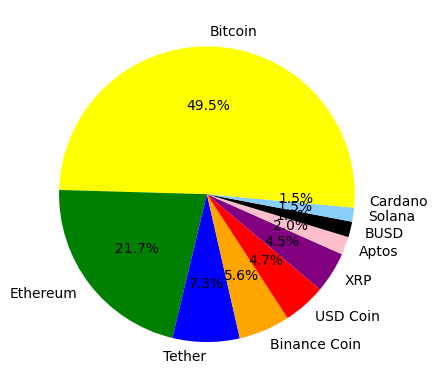

In [338]:
#Present the information in a Pie chart; with the objective of visualize the relative size of each cryptocurrency's market capitalization.
mktcap_df=pd.DataFrame({
    "Cryptocurrency":name_mktcap_list,
    "Price":price_mktcap_list,
    "Market Capitalization":mktcap_list
})
colors = ["yellow","green","blue","orange","red","purple","pink","black","lightskyblue"]
plt.pie(mktcap_df["Market Capitalization"], labels=volume_df["Cryptocurrency"], colors=colors,
        autopct="%1.1f%%")
# Save an image of the chart and print the final product to the screen
plt.savefig("Images/PieMktCap.png")
plt.show

In [299]:
#Get the information with json format, and isolates data items for easy reading
responsevolume=requests.get(urlvolume).json()
datavolume=responsevolume["Data"]
#datavolume

In [321]:
#Obtain the names of the top 10 main currencies considering 24-hour trading volume. Create a list for the name, price and mktcap for each cryptocurrencies in the top 10. 
indexes=range(0,10)
name_volume_list=[]
price_volume_list=[]
volume_list=[]
for index in indexes:
    name_v=data[index]["CoinInfo"]["FullName"]
    price_v=data[index]["RAW"]["USD"]["PRICE"]
    volume=data[index]["RAW"]["USD"]['VOLUME24HOUR']
    name_volume_list.append(name_v)
    price_volume_list.append(price_v)
    volume_list.append(volume)


In [322]:
#Create a DataFrame with the information
volume_df1=pd.DataFrame({
    "Cryptocurrency":name_mktcap_list,
    "Price":price_mktcap_list,
    "Volume":volume_list
})

In [325]:
#Format the columns
volume_df1["Price"] = volume_df1["Price"].map("${:,.2f}".format)
volume_df1["Volume"] = volume_df1["Volume"].map("{:,.2f}".format)
#volume_df =volume_df_table.sort_values(["Volume"])
volume_df1

,Cryptocurrency,Price,Volume
0,Bitcoin,"$23,711.54","54,118.93"
1,Ethereum,"$1,636.44","473,418.44"
2,Tether,$1.00,"113,550,488.54"
3,Binance Coin,$317.39,"42,611.16"
4,USD Coin,$1.00,"6,505,939.91"
5,XRP,$0.41,"22,546,801.27"
6,Aptos,$17.89,"622,322.24"
7,BUSD,$1.00,"965,923.80"
8,Solana,$26.21,"3,767,672.08"
9,Cardano,$0.39,"74,520,649.44"


<function matplotlib.pyplot.show(close=None, block=None)>

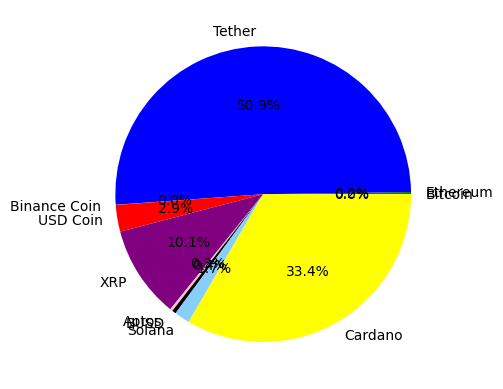

In [339]:
#Present the information in a Pie chart; with the objective of visualize the relative size of each cryptocurrency's volumen trade in the past 24 hours.
volume_df=pd.DataFrame({
    "Cryptocurrency":name_mktcap_list,
    "Price":price_mktcap_list,
    "Volume":volume_list
})
colors = ["yellow","green","blue","orange","red","purple","pink","black","lightskyblue"]
plt.pie(volume_df["Volume"], labels=volume_df["Cryptocurrency"], colors=colors,
        autopct="%1.1f%%")

# Save an image of the chart and print the final product to the screen
plt.savefig("Images/Pievolume.png")
plt.show